In [1]:
# Bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score

Exploration des données du airbnb_train et du airbnb_test

In [2]:
# import des données
train_data = pd.read_csv('airbnb_train.csv')
test_data = pd.read_csv('airbnb_test.csv')

In [3]:
print("Train Data:")
train_data.head()

Train Data:


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [4]:
print("Test Data:")
test_data.head()

Test Data:


,Unnamed: 0,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,14282777,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,17029381,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7824740,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,19811650,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117.0,2.0,2.0
4,12410741,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


Nous remarquons qu'il y'a beaucoup de valeur manquante dans les données de test. Cela sera utile pour la préparation des données.

In [5]:
missing_value_test = test_data.isna()

print("Missing values in test data:")
print(missing_value_test.sum())

Missing values in test data:
Unnamed: 0                    0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   149
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              11139
host_has_profile_pic        132
host_identity_verified      132
host_response_rate        12824
host_since                  132
instant_bookable              0
last_review               11111
latitude                      0
longitude                     0
name                          0
neighbourhood              4786
number_of_reviews             0
review_scores_rating      11744
zipcode                     663
bedrooms                     65
beds                         96
dtype: int64


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [7]:
train_data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.223400e+04,22234.000000,22234.000000,22183.000000,22234.000000,22234.000000,22234.000000,17256.000000,22208.000000,22199.000000
mean,1.122269e+07,4.783481,3.155573,1.236037,38.462971,-92.269305,20.670774,94.069077,1.264769,1.711473
std,6.080480e+06,0.718758,2.143870,0.586246,3.071679,21.670081,37.183731,7.782235,0.852819,1.254903
min,3.362000e+03,2.302585,1.000000,0.000000,33.339002,-122.510940,0.000000,20.000000,0.000000,0.000000
25%,6.202924e+06,4.317488,2.000000,1.000000,34.136082,-118.340633,1.000000,92.000000,1.000000,1.000000
50%,1.217425e+07,4.700480,2.000000,1.000000,40.662632,-76.994944,6.000000,96.000000,1.000000,1.000000
75%,1.639502e+07,5.220356,4.000000,1.000000,40.746358,-73.954599,23.000000,100.000000,1.000000,2.000000
max,2.120450e+07,7.600402,16.000000,8.000000,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000


Préparation des données

Beaucoup de valeurs sont manquantes (après la préparation des données) dans : first_review, last_review et review_scores_rating et host_since. Nous supprimons donc ces colonnes de train et test.

In [8]:
train_data.drop(columns=['first_review', 'last_review', 'review_scores_rating','host_since'], inplace=True)
test_data.drop(columns=['first_review', 'last_review', 'review_scores_rating','host_since'], inplace=True)


Nous choisissons de remplacer les valeurs manquantes par la médiane afin d'éviter des erreurs de logique (0 chambres n'a pas de sens) et afin de à la sensibilité due aux valeurs extrêmes.

In [9]:
train_data['bathrooms'].fillna(train_data['bathrooms'].median(), inplace=True)
train_data['bedrooms'].fillna(train_data['bedrooms'].median(), inplace=True)
train_data['beds'].fillna(train_data['beds'].median(), inplace=True)

Nous remplaçons les valeurs des colonnes booléennes / catégorielles par la valeur la plus fréquente dans la colonne.

In [10]:
train_data['host_has_profile_pic'].fillna(train_data['host_has_profile_pic'].mode()[0], inplace=True)
train_data['host_identity_verified'].fillna(train_data['host_identity_verified'].mode()[0], inplace=True)
train_data['host_response_rate'].fillna(train_data['host_response_rate'].mode()[0], inplace=True)
train_data['zipcode'].fillna(train_data['zipcode'].mode()[0], inplace=True)
train_data['neighbourhood'].fillna(train_data['neighbourhood'].mode()[0], inplace=True)

In [11]:
print("Missing values in test data:")
print(train_data.isnull().sum())

Missing values in test data:
id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


Exécution du même process pour test_data :

In [12]:
test_data['bathrooms'].fillna(train_data['bathrooms'].median(), inplace=True)
test_data['bedrooms'].fillna(train_data['bedrooms'].median(), inplace=True)
test_data['beds'].fillna(train_data['beds'].median(), inplace=True)

In [13]:
test_data['host_has_profile_pic'].fillna(train_data['host_has_profile_pic'].mode()[0], inplace=True)
test_data['host_identity_verified'].fillna(train_data['host_identity_verified'].mode()[0], inplace=True)
test_data['host_response_rate'].fillna(train_data['host_response_rate'].mode()[0], inplace=True)
test_data['zipcode'].fillna(train_data['zipcode'].mode()[0], inplace=True)
test_data['neighbourhood'].fillna(train_data['neighbourhood'].mode()[0], inplace=True)

Transformation des colonnes catégorielles en type numérique

In [14]:
class CustomTransformation():

    def __init__(self):
        """
        Class simple pour convertir les type de propriétés en des indices numériques, utilisable pour un algo de machine learning
        """

        self.fitted = False # Indique si fit_transform a été utilisé, pour éviter d’utiliser transform sans que fit ai été appelé
        self.property2index = dict() # Dictionnaire qui va convertir le nom en indice
        self.max_index = 0 # Indique le dernier indice de la propriété.

    def fit_transform(self, dataset, colonne):

        self.fitted = True

        # Récupère les types de colonne
        types = dataset[colonne].unique()
        print("Tous les types de", colonne, ":", types)

        self.property2index = {prop:i for (i, prop) in enumerate(types)}
        self.max_index = max(list(self.property2index.values()))

        # transform
        return self.transform(dataset, colonne)
    
    def transform(self, dataset, colonne):
        # Transforme les colonnes en indice
        dataset.loc[:, colonne] = dataset[colonne].replace(self.property2index)


        # Ligne un peu moche qui fait en sorte de remplacer les lignes qui ont des nom de logement qui n’était pas dans l’entrainement
        dataset.loc[dataset[colonne].map(type).eq(str), colonne] = np.nan
        return dataset
        

Transformation des colonnes suivantes :
property_type,
room_type,
bed_type,
cancellation_policy,
city,
neighbourhood,
host_has_profile_pic,
host_identity_verified,
instant_bookable

In [15]:
features_transformer = CustomTransformation()

columns = ["property_type", "room_type", "bed_type", "cancellation_policy", "city", "neighbourhood",
                       "host_has_profile_pic", "host_identity_verified", "instant_bookable","zipcode"]

for col in columns:
    train_data_numerized = features_transformer.fit_transform(train_data, col)
    

train_data_numerized.head()

Tous les types de property_type : ['House' 'Apartment' 'Townhouse' 'Guest suite' 'Condominium' 'Timeshare'
 'Chalet' 'Guesthouse' 'Bungalow' 'Loft' 'In-law' 'Boat' 'Dorm' 'Other'
 'Bed & Breakfast' 'Camper/RV' 'Villa' 'Boutique hotel' 'Cabin' 'Hostel'
 'Hut' 'Yurt' 'Serviced apartment' 'Castle' 'Vacation home' 'Tent' 'Cave'
 'Tipi' 'Earth House' 'Island' 'Treehouse']
Tous les types de room_type : ['Private room' 'Entire home/apt' 'Shared room']
Tous les types de bed_type : ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
Tous les types de cancellation_policy : ['flexible' 'strict' 'moderate' 'super_strict_30' 'super_strict_60']
Tous les types de city : ['LA' 'NYC' 'DC' 'SF' 'Chicago' 'Boston']
Tous les types de neighbourhood : ['Long Beach' 'Ridgewood' 'U Street Corridor' 'Sunnyside' 'Noe Valley'
 'West Village' 'Harlem' 'Flushing' 'Westside' 'Upper West Side'
 'Shepherd Park' 'Santa Monica' 'Mission District' 'Murray Hill'
 'Williamsburg' 'Chinatown' 'Echo Park' 'Hamilton Heights

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,zipcode,bedrooms,beds
0,5708593,4.317488,0,0,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,0,0,False,...,100%,0,33.782712,-118.134410,Island style Spa Studio,0,0,0,0.0,2.0
1,14483613,4.007333,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,0,1,False,...,100%,0,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",1,38,1,1.0,2.0
2,10412649,7.090077,1,1,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,0,0,False,...,100%,0,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,2,0,2,2.0,2.0
3,17954362,3.555348,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,0,0,True,...,100%,1,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,3,19,3,1.0,1.0
4,9969781,5.480639,0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,0,2,True,...,100%,1,37.744896,-122.430665,Zen Captured Noe Valley House,4,15,4,2.0,2.0


In [16]:
columns = ["property_type", "room_type", "bed_type", "cancellation_policy", "city", "neighbourhood",
                       "host_has_profile_pic", "host_identity_verified", "instant_bookable","zipcode"]

for col in columns:
    test_data_numerized = features_transformer.transform(test_data, col)
    
test_data_numerized.head()

,Unnamed: 0,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,zipcode,bedrooms,beds
0,14282777,NaN,NaN,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,NaN,NaN,True,NaN,...,100%,NaN,40.696524,-73.991617,Beautiful brownstone 1-bedroom,NaN,2,313,1.0,1.0
1,17029381,NaN,NaN,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,NaN,NaN,True,NaN,...,100%,NaN,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,NaN,6,31,3.0,3.0
2,7824740,NaN,NaN,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,NaN,NaN,True,NaN,...,100%,NaN,40.808110,-73.943756,The Garden Oasis,NaN,10,6,1.0,3.0
3,19811650,NaN,NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,NaN,NaN,True,NaN,...,100%,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,NaN,0,286,2.0,2.0
4,12410741,NaN,NaN,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,NaN,NaN,True,NaN,...,100%,NaN,38.925627,-77.034596,Great studio in midtown DC,NaN,4,2,0.0,1.0


Transformer 'cleaning_fee' en int

In [17]:
train_data['cleaning_fee'] = train_data['cleaning_fee'].astype('int')
test_data['cleaning_fee'] = test_data['cleaning_fee'].astype('int')

Transformer 'host_response_rate' de string à float

In [18]:
train_data['host_response_rate'] = train_data['host_response_rate'].str.rstrip('%').astype('float') / 100.0
test_data['host_response_rate'] = test_data['host_response_rate'].str.rstrip('%').astype('float') / 100.0


Traitement de amenities : choix de créer des colonnes pour chaque équipement et de remplir 1 si l'équipement est présent et 0 sinon.

In [19]:
def extract_amenities(amenities_str):
        """
        Fonction pour extraire les équipements 
        """
        # Retirons les accolades
        amenities_str = amenities_str.strip('{}')
        amenities_list = amenities_str.split(',') 
        # Retirons les guillemets supplémentaires
        amenities_list = [amenity.strip().strip('"').strip("'") for amenity in amenities_list]
        return amenities_list


all_amenities = set()
for amenity in train_data['amenities']:
        all_amenities.update(extract_amenities(amenity))
        
print("Nombre total d'équipement référencé :", len(all_amenities))

Nombre total d'équipement référencé : 125


Le fichier test contient des équipements non référencé dans le fichier train ...

In [20]:
for amenity in test_data['amenities']:
        all_amenities.update(extract_amenities(amenity))
        
print("Nombre total d'équipement référencé :", len(all_amenities))
    

Nombre total d'équipement référencé : 131


In [21]:
train_data['total_amenities'] = train_data['amenities'].apply(lambda x: len(extract_amenities(x)))
test_data['total_amenities'] = test_data['amenities'].apply(lambda x: len(extract_amenities(x)))


Calculer le nombre total d'équipements et supprimer les colonnes `amenities` individuelles
De même suppression de la colonne amenities qui n'est plus utile et des colonnes name, description qui ne sont pas utile non plus pour le machine learning. 

Choix de faire la somme des aminities, dû à :

-certains amenities sont présents dans test_data et pas dans train_data
-cela permet d'enlever le bruit et de considérer une seule colonne au lieu de plus de 100 colonnes avec des corrélations allant de NaN (du au amenities non présent dans train_data mais dans test_data), passant par -0.20 jusqu'à 0.10

In [22]:
train_data.drop(columns=['amenities'], inplace=True)
test_data.drop(columns=['amenities'], inplace=True)
train_data.drop(columns=['name', 'description'], inplace=True)
test_data.drop(columns=['name', 'description'], inplace=True)

Vérification que toutes les colonnes sont conformes (conversion numérique réussie).

In [23]:
non_numeric_columns = train_data.select_dtypes(include=['object']).columns.tolist()
for col in non_numeric_columns:
    print(f"{col}: {type(train_data[col][0])}")

print(train_data[non_numeric_columns].head())

property_type: <class 'int'>
room_type: <class 'int'>
bed_type: <class 'int'>
cancellation_policy: <class 'int'>
city: <class 'int'>
host_has_profile_pic: <class 'int'>
host_identity_verified: <class 'int'>
instant_bookable: <class 'int'>
neighbourhood: <class 'int'>
zipcode: <class 'int'>
  property_type room_type bed_type cancellation_policy city  \
0             0         0        0                   0    0   
1             0         0        0                   1    1   
2             1         1        0                   0    2   
3             0         0        0                   0    1   
4             0         1        0                   2    3   

  host_has_profile_pic host_identity_verified instant_bookable neighbourhood  \
0                    0                      0                0             0   
1                    0                      1                0             1   
2                    0                      0                0             2   
3         

Procédons aux calculs des corrélations.

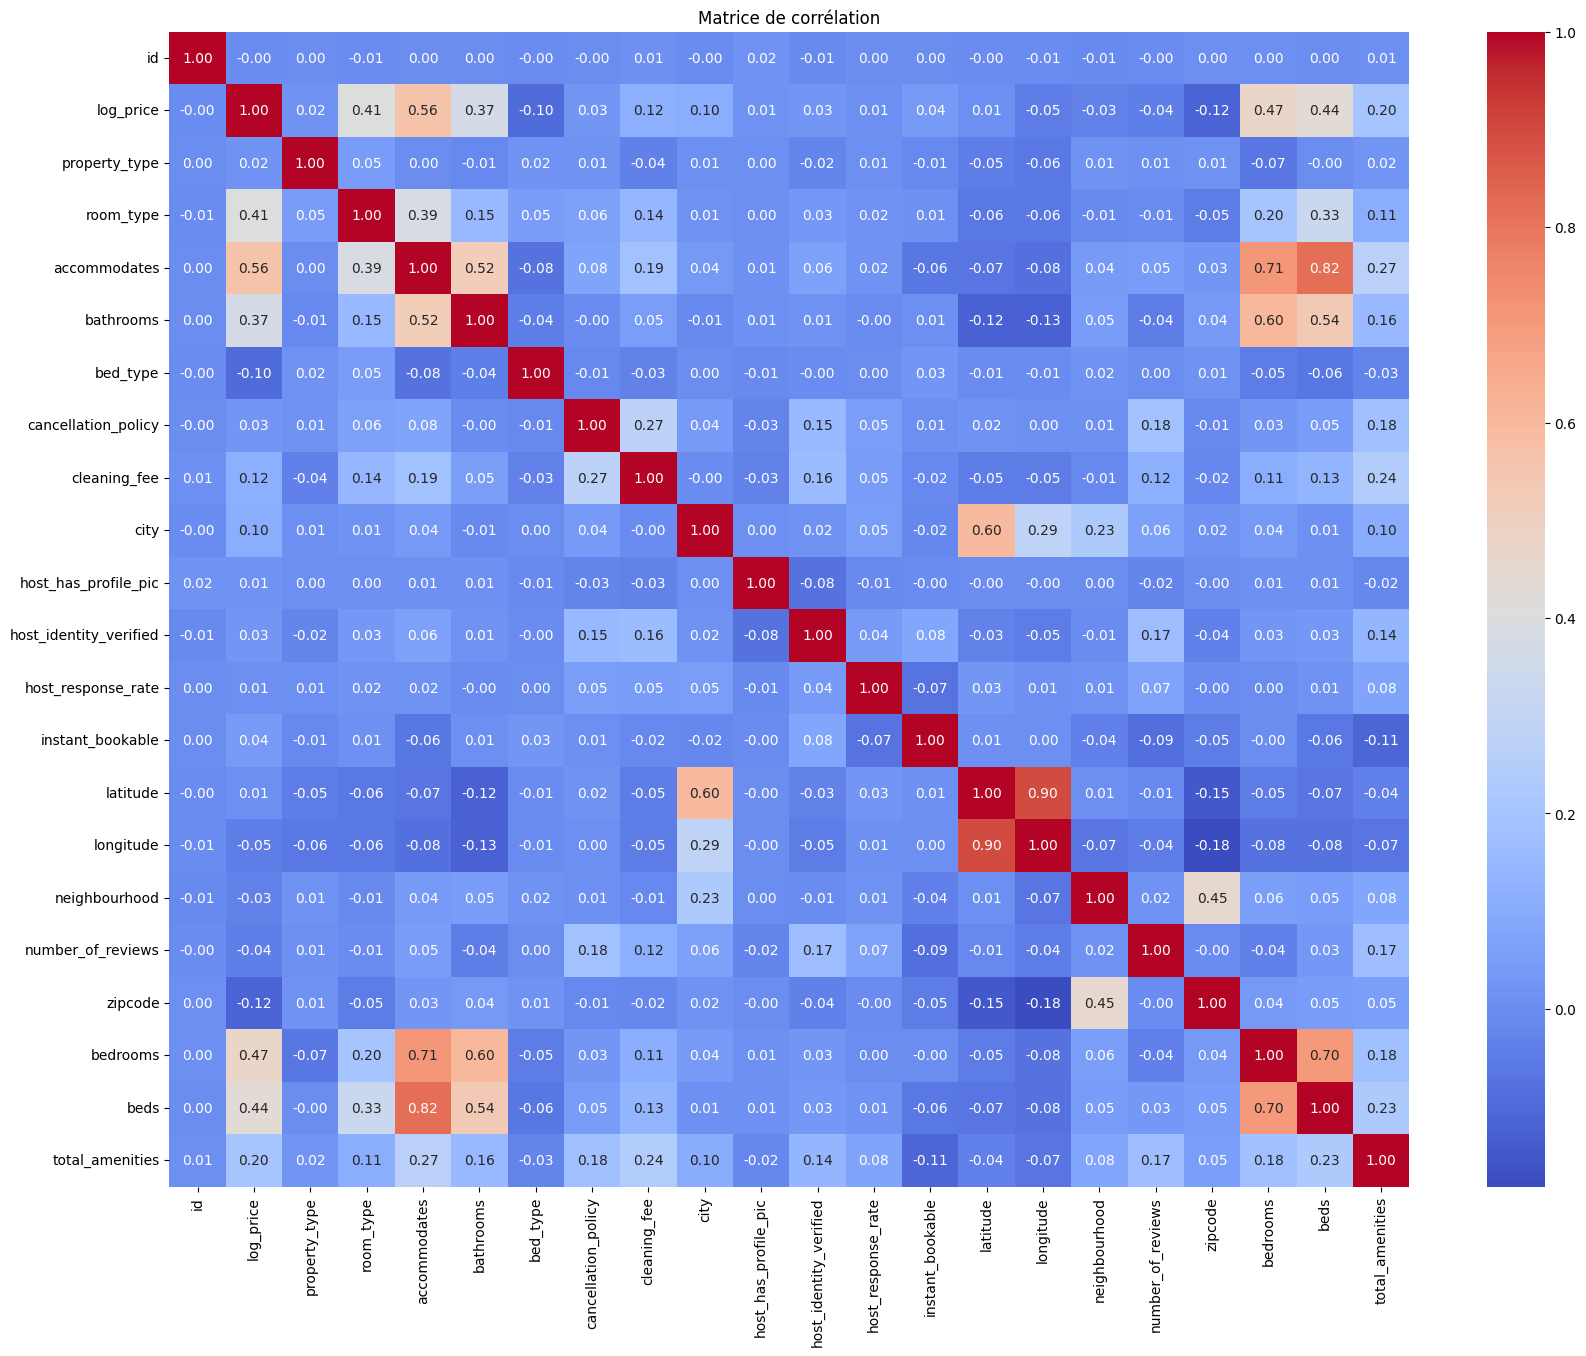

In [24]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

Corrélations de log_price avec les autres colonnes et sélection des 10 caractéristiques les plus corrélées avec log_price

In [25]:
correlation_with_log_price = correlation_matrix['log_price'].sort_values(ascending=False)
print(correlation_with_log_price)
top_features = correlation_with_log_price.index[1::]

log_price                 1.000000
accommodates              0.564874
bedrooms                  0.472728
beds                      0.435068
room_type                 0.406694
bathrooms                 0.368856
total_amenities           0.198436
cleaning_fee              0.115116
city                      0.104990
instant_bookable          0.040482
host_identity_verified    0.030285
cancellation_policy       0.026986
property_type             0.018080
host_has_profile_pic      0.013117
host_response_rate        0.005498
latitude                  0.005231
id                       -0.002122
neighbourhood            -0.032620
number_of_reviews        -0.039138
longitude                -0.045348
bed_type                 -0.097958
zipcode                  -0.115141
Name: log_price, dtype: float64


Entraînement

In [26]:
X = train_data[top_features]
y = train_data['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardisation

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Réduction de dimensionnalité avec l'ACP

In [28]:
use_pca = False # Essai avec PCA ou non
if use_pca:
    pca = PCA(n_components=10) 
    X_train_scaled = pca.fit_transform(X_train_scaled)
    X_test_scaled = pca.transform(X_test_scaled)

In [29]:
model = LinearSVR(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)

print(f"Score en entraînement : {train_score}")
print(f"Score en test : {test_score}")

C:\Users\markz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score en entraînement : 0.41186522088757105
Score en test : 0.4139481804525499


C:\Users\markz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


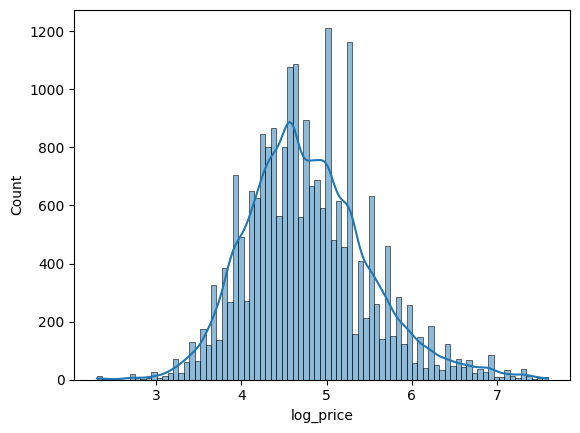

In [30]:
# Visualisation de la distribution des prix
sns.histplot(train_data['log_price'], kde=True)
plt.show()